## **Load Dataset**

In [2]:
!pip install lifelines

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/349.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/349.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/349.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/349.3 kB ? eta -:--:--
   --------- ----------------------------- 81.9/349.3 kB 657.6 kB/s eta 0:00:01
   ---------------------- ----------------- 194.6/349.3 kB 1.1 MB/s eta 0:00:01
   ------------------------------------- -- 327.7/349.3 kB 1.7 MB/s eta 0:00:01
   ------------------------------------- -- 327.7/349.3 kB 1.7 MB/s eta 0:00:01
   -------------------------------------- - 337.9/349.3 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 349.3/349.3 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/52.5 kB ? eta -:--:--
   ---------------------------------------- 52.5/52.5 kB 2.6 M

In [375]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import lifelines
import seaborn as sns
from pandas.api.types import CategoricalDtype
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import joblib
import streamlit as st
from matplotlib.colors import ListedColormap
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.utils import concordance_index
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored
from sklearn.model_selection import cross_val_score
from sksurv.util import Surv
from sklearn.inspection import permutation_importance

In [377]:
df = pd.read_csv('Breast Cancer.csv')
df.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Primary Tumor Laterality,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,Positive,3.0,Neutral,Negative,Ductal/NST,Yes,Post,4ER+,Right,10.0,NaN,6.044,IDC,140.500000,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,Positive,3.0,Neutral,Negative,Ductal/NST,Yes,Pre,4ER+,Right,0.0,2.0,4.020,IDC,84.633333,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,Positive,2.0,Neutral,Negative,Ductal/NST,Yes,Pre,3,Right,1.0,2.0,4.030,IDC,163.700000,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,Positive,2.0,Neutral,Negative,Mixed,Yes,Pre,9,Right,3.0,1.0,4.050,MDLC,164.933333,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,Positive,3.0,Neutral,Negative,Mixed,Yes,Post,9,Right,8.0,2.0,6.080,MDLC,41.366667,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


## **EDA**

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

In [16]:
print(df.describe())

       Age at Diagnosis       Cohort  Neoplasm Histologic Grade  Lymph nodes examined positive  Mutation Count  Nottingham prognostic index  Overall Survival (Months)  Relapse Free Status (Months)   Tumor Size  Tumor Stage
count       2498.000000  2498.000000                2388.000000                    2243.000000     2357.000000                  2287.000000                1981.000000                   2388.000000  2360.000000  1788.000000
mean          60.420300     2.900320                   2.412060                       1.950513        5.578702                     4.028787                 125.244271                    108.842487    26.220093     1.713647
std           13.032997     1.962216                   0.649363                       4.017774        3.967967                     1.189092                  76.111772                     76.519494    15.370883     0.655307
min           21.930000     1.000000                   1.000000                       0.000000        1.0000

In [195]:
# Missing Data Analysis
missing_values = df.isnull().sum()
print(missing_values)

Patient ID                        0
Age at Diagnosis                  0
Type of Breast Surgery            0
Cancer Type                       0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
Cohort                            0
ER status measured by IHC         0
ER Status                         0
Neoplasm Histologic Grade         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Integrative Cluster               0
Primary Tumor Laterality          0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Oncotree Code                     0
Overall Survival (Months)         0
Overall Survival Status           0
PR Status                         0
Radio Therapy                     0
Relapse Free Status (Months)

In [197]:
# Drop if 'Overall Survival Status' or 'Relapse Free Status' is NaN
df = df.dropna(subset=['Overall Survival Status', 'Relapse Free Status'])

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1092 entries, 1 to 1743
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Patient ID                      1092 non-null   object  
 1   Age at Diagnosis                1092 non-null   float64 
 2   Type of Breast Surgery          1092 non-null   object  
 3   Cancer Type                     1092 non-null   object  
 4   Cancer Type Detailed            1092 non-null   object  
 5   Cellularity                     1092 non-null   object  
 6   Chemotherapy                    1092 non-null   object  
 7   Pam50 + Claudin-low subtype     1092 non-null   object  
 8   Cohort                          1092 non-null   float64 
 9   ER status measured by IHC       1092 non-null   object  
 10  ER Status                       1092 non-null   object  
 11  Neoplasm Histologic Grade       1092 non-null   float64 
 12  HER2 status measured by S

In [201]:
# Change data type
df = df.apply(lambda x: x.astype('category') if x.dtype == 'object' else x)
df['Patient ID'] =  df['Patient ID'].astype('object')

tumor_stage_type = CategoricalDtype(categories=[0, 1, 2, 3, 4], ordered=True)
df['Tumor Stage'] = df['Tumor Stage'].astype(tumor_stage_type)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1092 entries, 1 to 1743
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Patient ID                      1092 non-null   object  
 1   Age at Diagnosis                1092 non-null   float64 
 2   Type of Breast Surgery          1092 non-null   category
 3   Cancer Type                     1092 non-null   category
 4   Cancer Type Detailed            1092 non-null   category
 5   Cellularity                     1092 non-null   category
 6   Chemotherapy                    1092 non-null   category
 7   Pam50 + Claudin-low subtype     1092 non-null   category
 8   Cohort                          1092 non-null   float64 
 9   ER status measured by IHC       1092 non-null   category
 10  ER Status                       1092 non-null   category
 11  Neoplasm Histologic Grade       1092 non-null   float64 
 12  HER2 status measured by S

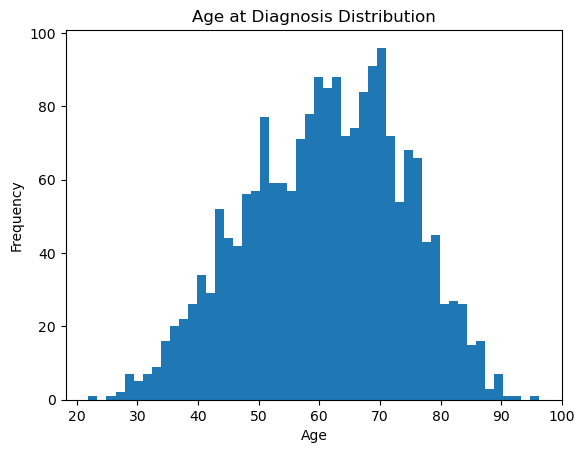

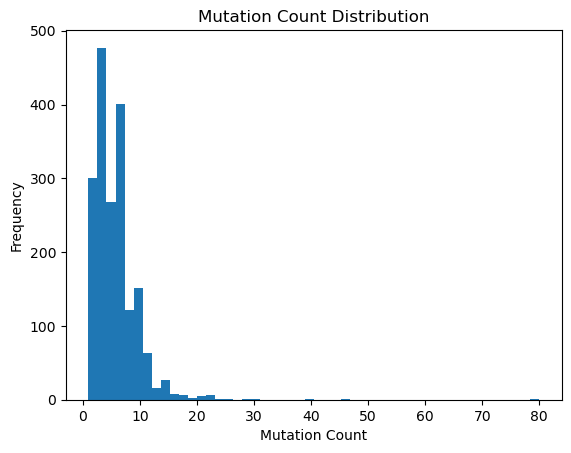

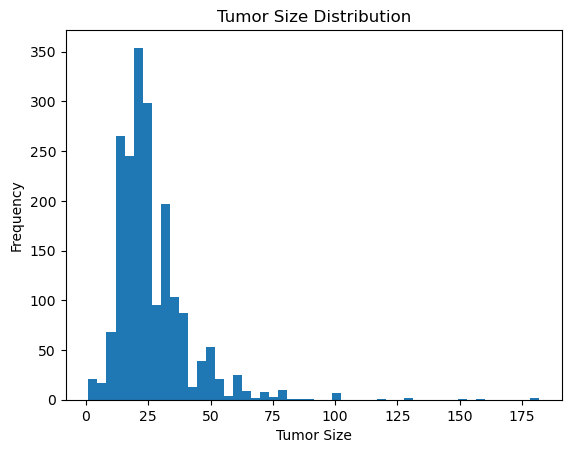

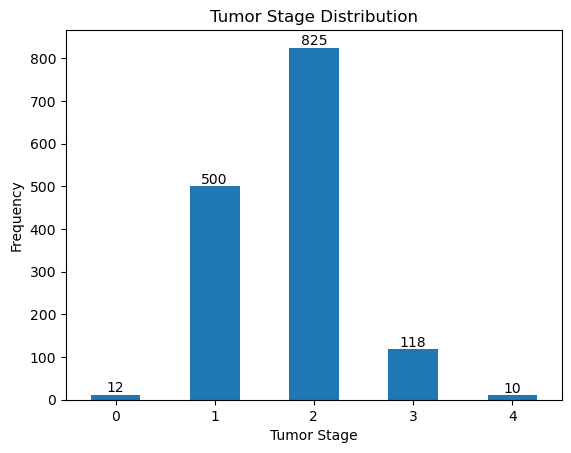

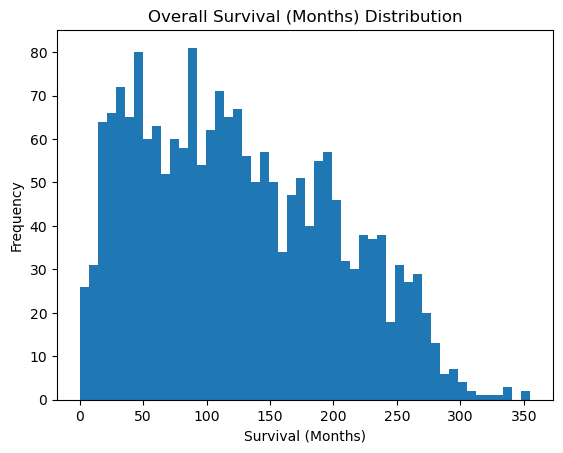

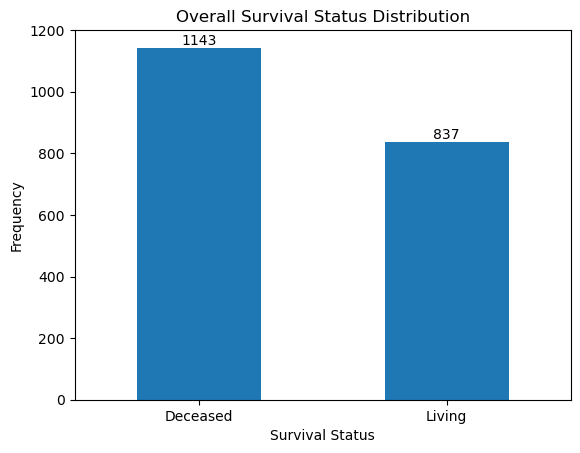

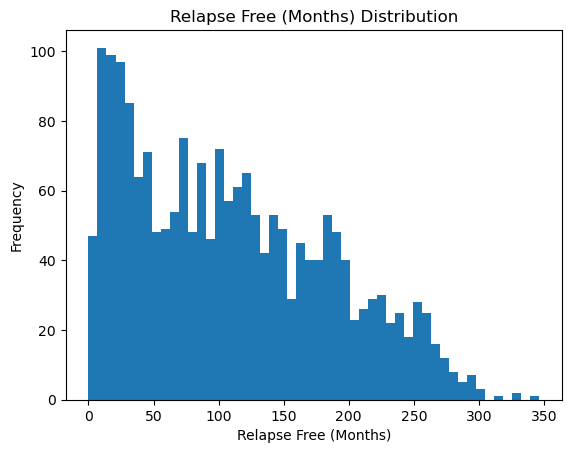

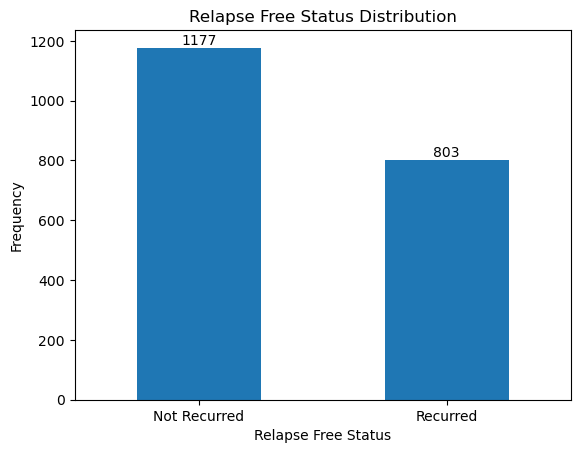

In [32]:
# Univariate Analysis
# For a numerical variable

df['Age at Diagnosis'].hist(bins=50)
plt.title('Age at Diagnosis Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

df['Mutation Count'].hist(bins=50)
plt.title('Mutation Count Distribution')
plt.xlabel('Mutation Count')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

df['Tumor Size'].hist(bins=50)
plt.title('Tumor Size Distribution')
plt.xlabel('Tumor Size')
plt.ylabel('Frequency')
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

ax = df['Tumor Stage'].value_counts().sort_index().plot(kind='bar')
plt.title('Tumor Stage Distribution')
plt.xlabel('Tumor Stage')
plt.ylabel('Frequency')
plt.grid(False)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

df['Overall Survival (Months)'].hist(bins=50)
plt.title('Overall Survival (Months) Distribution')
plt.xlabel('Survival (Months)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

ax = df['Overall Survival Status'].value_counts().plot(kind='bar')
plt.title('Overall Survival Status Distribution')
plt.xlabel('Survival Status')
plt.ylabel('Frequency')
plt.grid(False)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

df['Relapse Free Status (Months)'].hist(bins=50)
plt.title('Relapse Free (Months) Distribution')
plt.xlabel('Relapse Free (Months)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

ax = df['Relapse Free Status'].value_counts().plot(kind='bar')
plt.title('Relapse Free Status Distribution')
plt.xlabel('Relapse Free Status')
plt.ylabel('Frequency')
plt.grid(False)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()


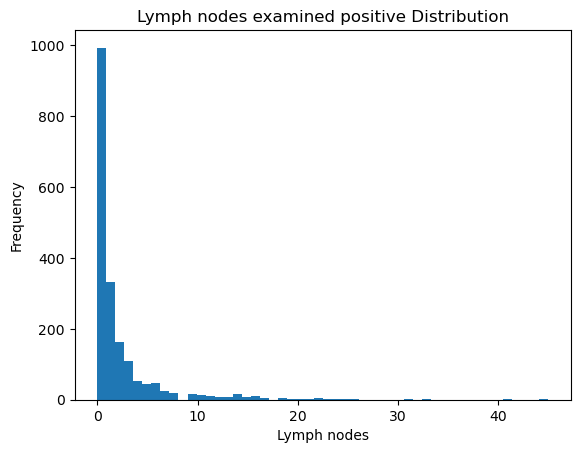

In [34]:
df['Lymph nodes examined positive'].hist(bins=50)
plt.title('Lymph nodes examined positive Distribution')
plt.xlabel('Lymph nodes')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

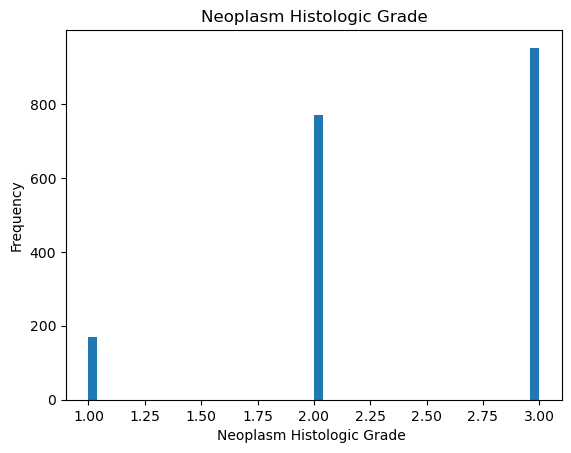

In [36]:
df['Neoplasm Histologic Grade'].hist(bins=50)
plt.title('Neoplasm Histologic Grade')
plt.xlabel('Neoplasm Histologic Grade ')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

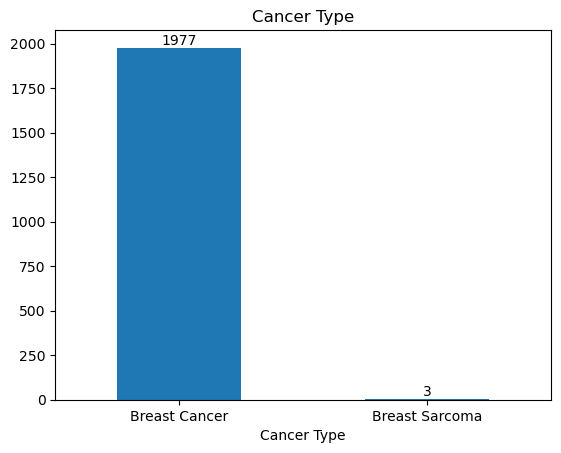

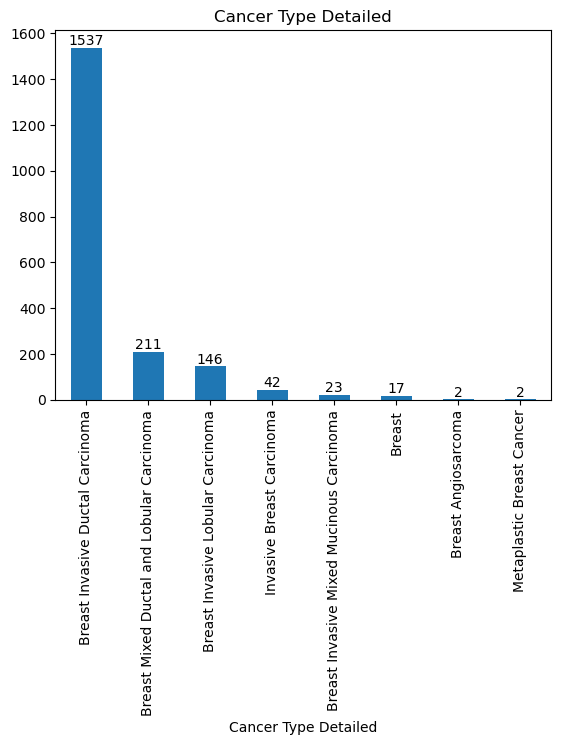

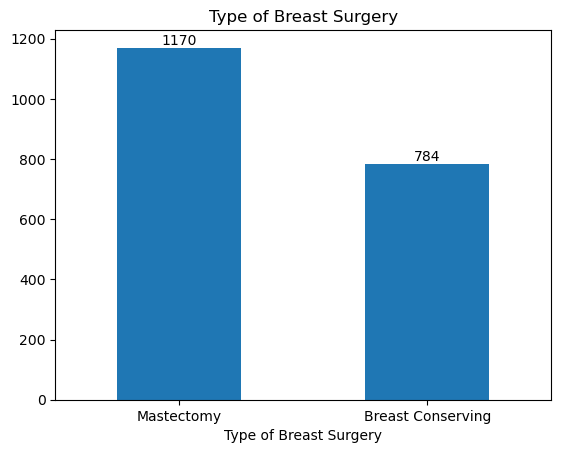

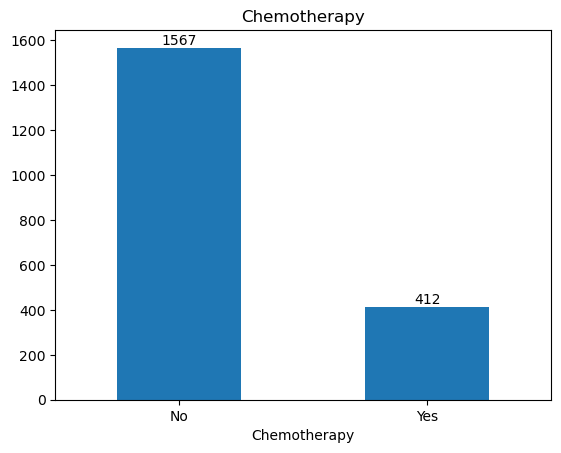

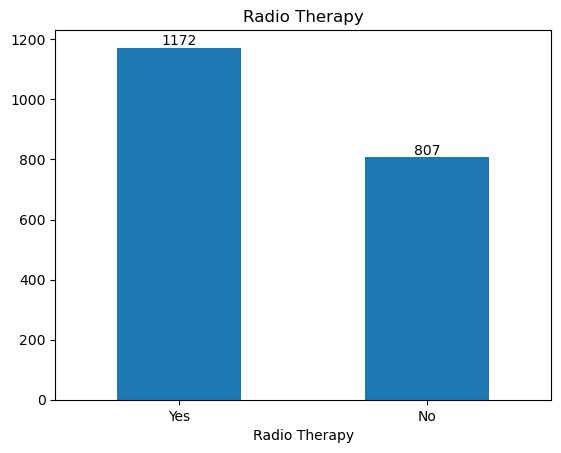

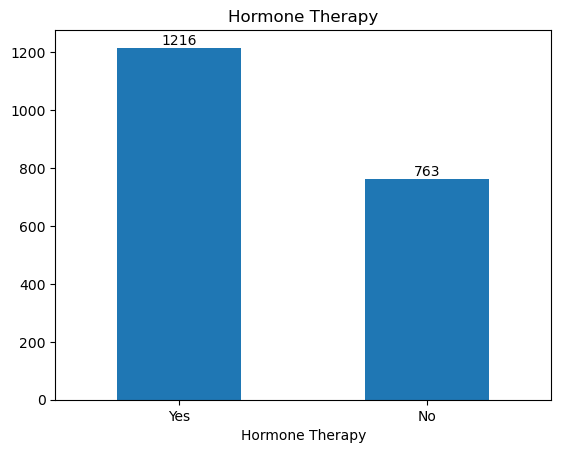

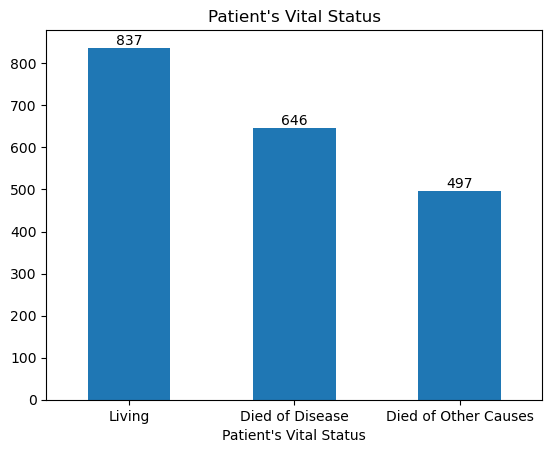

In [38]:
# For a categorical variable
ax = df['Cancer Type'].value_counts().plot(kind='bar')
plt.title('Cancer Type')
plt.grid(False)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

ax = df['Cancer Type Detailed'].value_counts().plot(kind='bar')
plt.title('Cancer Type Detailed')
plt.grid(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

ax = df['Type of Breast Surgery'].value_counts().plot(kind='bar')
plt.title('Type of Breast Surgery')
plt.grid(False)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

ax = df['Chemotherapy'].value_counts().plot(kind='bar')
plt.title('Chemotherapy')
plt.grid(False)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

ax = df['Radio Therapy'].value_counts().plot(kind='bar')
plt.title('Radio Therapy')
plt.grid(False)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

ax = df['Hormone Therapy'].value_counts().plot(kind='bar')
plt.title('Hormone Therapy')
plt.grid(False)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

ax = df["Patient's Vital Status"].value_counts().plot(kind='bar')
plt.title("Patient's Vital Status")
plt.grid(False)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

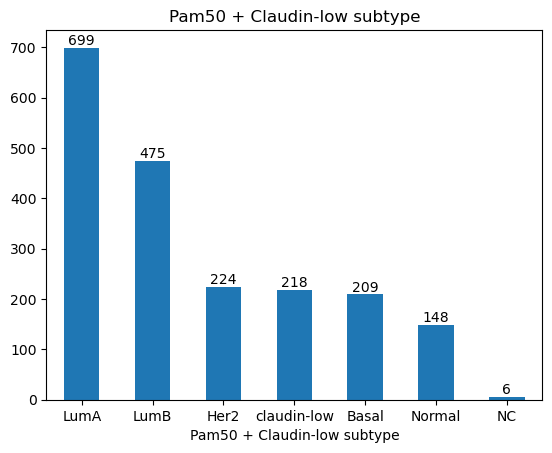

In [40]:
ax = df["Pam50 + Claudin-low subtype"].value_counts().plot(kind='bar')
plt.title("Pam50 + Claudin-low subtype")
plt.grid(False)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

In [42]:
# Drop 'cohort'
df = df.drop(['Cohort'], axis=1)

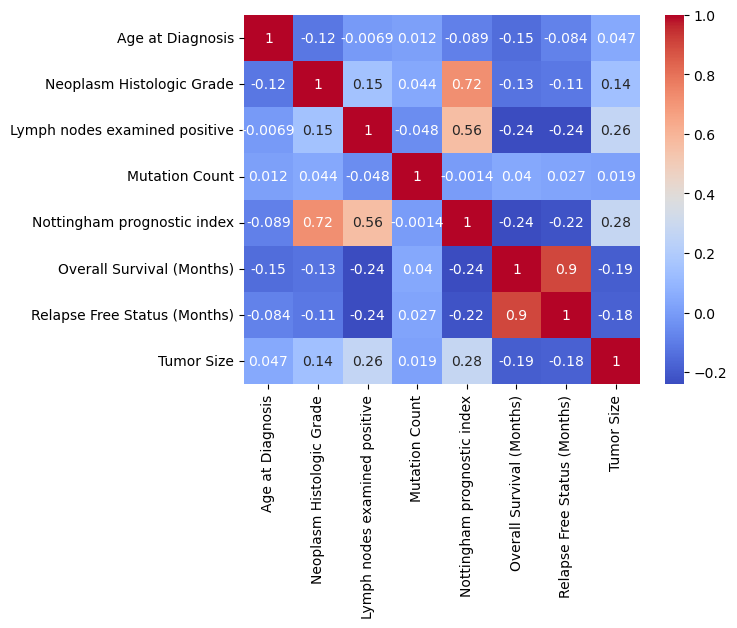

In [46]:
# Bivariate/Multivariate Analysis
# Calculate the correlation matrix, considering only numeric columns
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## **Survival Analysis**

**Kaplan-Meier**

In [51]:
df['Overall Survival (Months)']

0       140.500000
1        84.633333
2       163.700000
3       164.933333
4        41.366667
           ...    
1980    196.866667
1981     44.733333
1982    175.966667
1983     86.233333
1984    201.900000
Name: Overall Survival (Months), Length: 1980, dtype: float64

In [53]:
df['Overall Survival Status']

0         Living
1         Living
2       Deceased
3         Living
4       Deceased
          ...   
1980      Living
1981    Deceased
1982    Deceased
1983    Deceased
1984    Deceased
Name: Overall Survival Status, Length: 1980, dtype: category
Categories (2, object): ['Deceased', 'Living']

In [55]:
unique_values = df['Overall Survival Status'].unique()
print(unique_values)

['Living', 'Deceased']
Categories (2, object): ['Deceased', 'Living']


In [57]:
unique_values = df['Relapse Free Status'].unique()
print(unique_values)

['Not Recurred', 'Recurred']
Categories (2, object): ['Not Recurred', 'Recurred']


In [59]:
df['Overall Survival Status'] = np.uint8(df['Overall Survival Status'].map({'Living': 0, 'Deceased': 1}))
df['Relapse Free Status'] = np.uint8(df['Relapse Free Status'].map({'Not Recurred': 0, 'Recurred': 1}))

In [63]:
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()

In [67]:
T_1 = df['Overall Survival (Months)']
E_1 = df['Overall Survival Status']

T_2 = df['Relapse Free Status (Months)']
E_2 = df['Relapse Free Status']

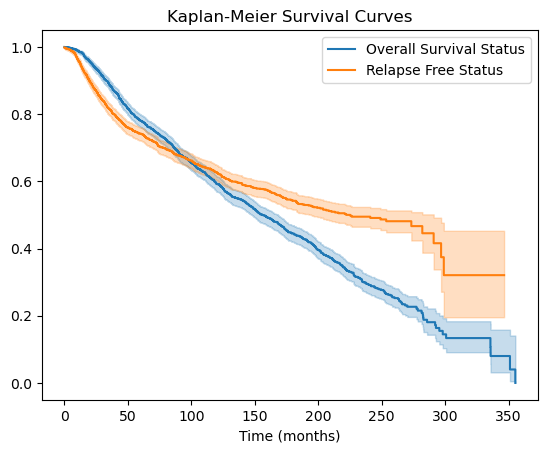

In [69]:
kmf1.fit(T_1, E_1, label='Overall Survival Status')
ax = kmf1.plot_survival_function()

kmf2.fit(T_2, E_2, label='Relapse Free Status')
kmf2.plot_survival_function(ax=ax)

# Add title and labels
plt.title('Kaplan-Meier Survival Curves')
plt.xlabel('Time (months)')

# Show the plot
plt.show()

**Kaplan-Meier in terms of surgery and therapies**

In [72]:
unique_values = df['Type of Breast Surgery'].unique()
print(unique_values)

['Mastectomy', 'Breast Conserving', NaN]
Categories (2, object): ['Breast Conserving', 'Mastectomy']


In [74]:
BreastConserving = df['Type of Breast Surgery'] == 'Breast Conserving'
Mastectomy = df['Type of Breast Surgery'] == 'Mastectomy'
# NoSurgery = df_metabric['Type of Breast Surgery'].isna()

group_labels = ['Breast Conserving', 'Mastectomy']

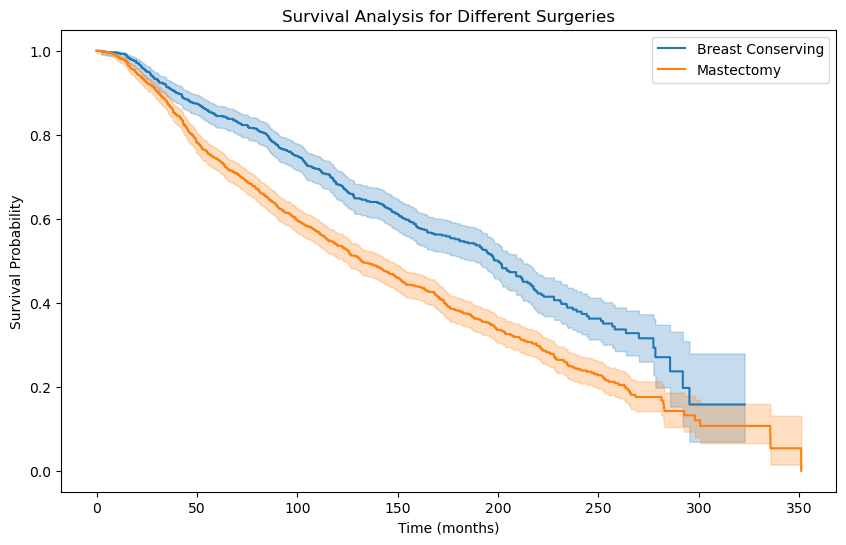

In [78]:
kmf = KaplanMeierFitter()
plt.figure(figsize=(10, 6))

for group, label in zip([BreastConserving, Mastectomy], group_labels):
    kmf.fit(df['Overall Survival (Months)'][group],
            df['Overall Survival Status'][group],
            label=label)
    kmf.plot_survival_function()

plt.title('Survival Analysis for Different Surgeries')
plt.xlabel('Time (months)')
plt.ylabel('Survival Probability')
plt.show()

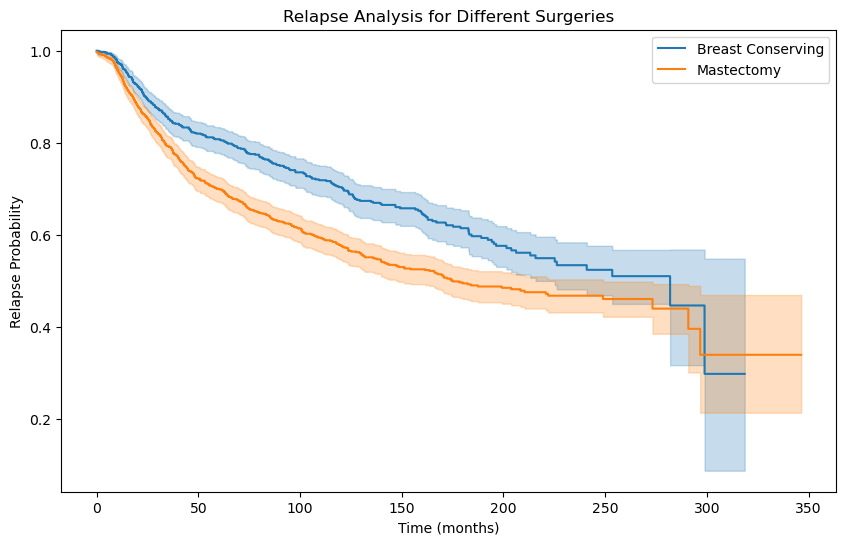

In [80]:

kmf = KaplanMeierFitter()
plt.figure(figsize=(10, 6))

for group, label in zip([BreastConserving, Mastectomy], group_labels):
    kmf.fit(df['Relapse Free Status (Months)'][group],
            df['Relapse Free Status'][group],
            label=label)
    kmf.plot_survival_function()

plt.title('Relapse Analysis for Different Surgeries')
plt.xlabel('Time (months)')
plt.ylabel('Relapse Probability')
plt.show()

In [82]:
therapy_columns = ['Chemotherapy', 'Radio Therapy', 'Hormone Therapy']

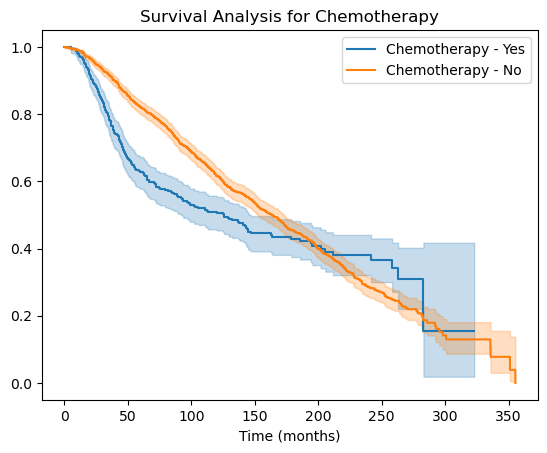

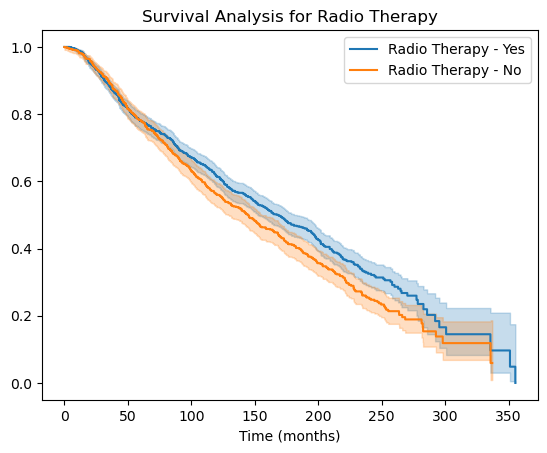

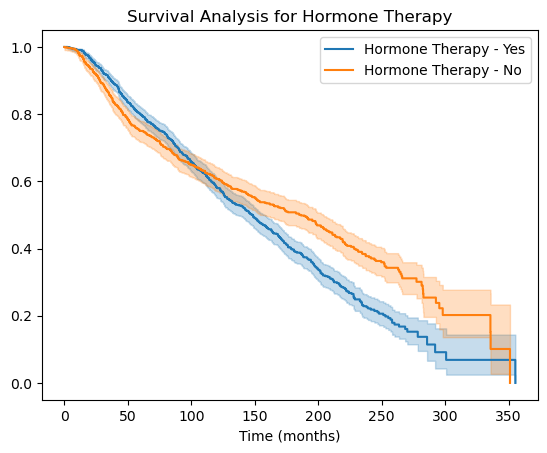

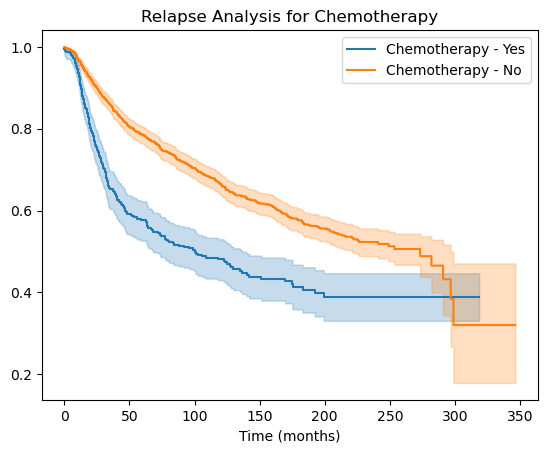

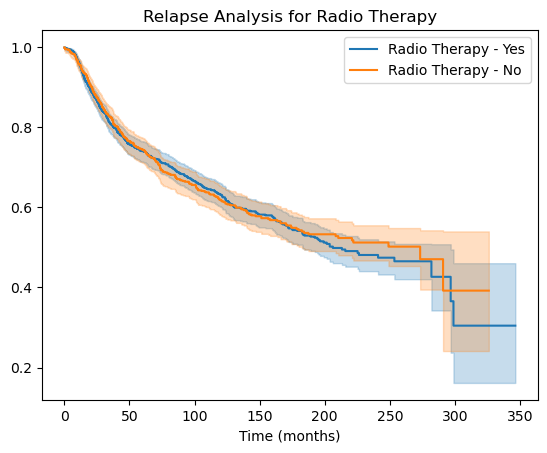

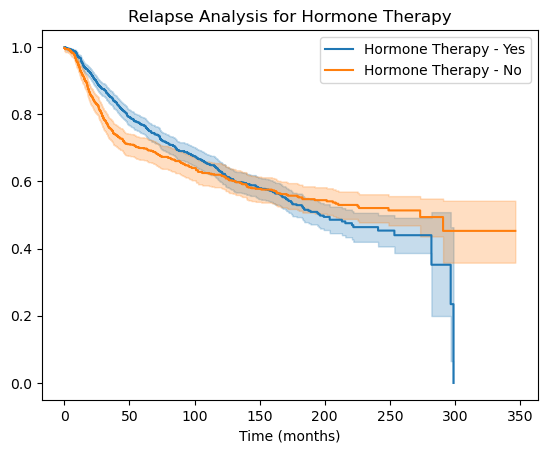

In [86]:
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()

for therapy in therapy_columns:
    kmf1.fit(df['Overall Survival (Months)'][df[therapy] == 'Yes'], df['Overall Survival Status'][df[therapy] == 'Yes'], label=f'{therapy} - Yes')
    ax = kmf1.plot_survival_function()
    kmf2.fit(df['Overall Survival (Months)'][df[therapy] == 'No'], df['Overall Survival Status'][df[therapy] == 'No'], label=f'{therapy} - No')
    kmf2.plot_survival_function(ax=ax)

    plt.title(f'Survival Analysis for {therapy}')
    plt.xlabel('Time (months)')
    plt.show()

for therapy in therapy_columns:
    kmf1.fit(df['Relapse Free Status (Months)'][df[therapy] == 'Yes'], df['Relapse Free Status'][df[therapy] == 'Yes'], label=f'{therapy} - Yes')
    ax = kmf1.plot_survival_function()
    kmf2.fit(df['Relapse Free Status (Months)'][df[therapy] == 'No'], df['Relapse Free Status'][df[therapy] == 'No'], label=f'{therapy} - No')
    kmf2.plot_survival_function(ax=ax)

    plt.title(f'Relapse Analysis for {therapy}')
    plt.xlabel('Time (months)')
    plt.show()

## **Cox Proportional Model**

In [9]:
df['Overall Survival Status'] = np.uint8(df['Overall Survival Status'].map({'Living': 0, 'Deceased': 1})).astype(int)
df['Relapse Free Status'] = np.uint8(df['Relapse Free Status'].map({'Not Recurred': 0, 'Recurred': 1})).astype(int)

In [11]:
df

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Primary Tumor Laterality,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,Positive,3.0,Neutral,Negative,Ductal/NST,Yes,Post,4ER+,Right,10.0,NaN,6.044,IDC,140.500000,0,Negative,Yes,138.65,0,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,Positive,3.0,Neutral,Negative,Ductal/NST,Yes,Pre,4ER+,Right,0.0,2.0,4.020,IDC,84.633333,0,Positive,Yes,83.52,0,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,Positive,2.0,Neutral,Negative,Ductal/NST,Yes,Pre,3,Right,1.0,2.0,4.030,IDC,163.700000,1,Positive,No,151.28,1,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,Positive,2.0,Neutral,Negative,Mixed,Yes,Pre,9,Right,3.0,1.0,4.050,MDLC,164.933333,0,Positive,Yes,162.76,0,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,Positive,3.0,Neutral,Negative,Mixed,Yes,Post,9,Right,8.0,2.0,6.080,MDLC,41.366667,1,Positive,Yes,18.55,1,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,MTS-T2428,70.05,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,Positive,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,2.540,BRCA,NaN,0,NaN,NaN,4.93,1,Female,NaN,27.0,1.0,NaN
2505,MTS-T2429,63.60,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,Positive,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0,4.560,BRCA,NaN,0,NaN,NaN,16.18,1,Female,NaN,28.0,2.0,NaN
2506,MTS-T2430,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6.0,NaN,BRCA,NaN,0,NaN,NaN,NaN,0,Female,NaN,NaN,0.0,NaN
2507,MTS-T2431,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7.0,NaN,BRCA,NaN,0,NaN,NaN,NaN,0,Female,NaN,NaN,0.0,NaN


In [19]:
min_age = df['Age at Diagnosis'].min()
max_age = df['Age at Diagnosis'].max()

In [458]:
max_age = max_age + (10 - max_age % 10) if max_age % 10 != 0 else max_age

bins = np.arange(min_age - (min_age % 10), max_age + 10, 10)

labels = [f"{i}-{i + 10}" for i in bins[:-1]]

df['Age Group'] = pd.cut(df['Age at Diagnosis'], bins=bins, labels=labels, right=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Patient ID                      2509 non-null   object  
 1   Age at Diagnosis                2498 non-null   float64 
 2   Type of Breast Surgery          1955 non-null   object  
 3   Cancer Type                     2509 non-null   object  
 4   Cancer Type Detailed            2509 non-null   object  
 5   Cellularity                     1917 non-null   object  
 6   Chemotherapy                    1980 non-null   object  
 7   Pam50 + Claudin-low subtype     1980 non-null   object  
 8   Cohort                          2498 non-null   float64 
 9   ER status measured by IHC       2426 non-null   object  
 10  ER Status                       2469 non-null   object  
 11  Neoplasm Histologic Grade       2388 non-null   float64 
 12  HER2 status measured

In [460]:
df

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Primary Tumor Laterality,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status,Age Group
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,Positive,3.0,Neutral,Negative,Ductal/NST,Yes,Post,4ER+,Right,10.0,NaN,6.044,IDC,140.500000,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living,70.0-80.0
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,Positive,3.0,Neutral,Negative,Ductal/NST,Yes,Pre,4ER+,Right,0.0,2.0,4.020,IDC,84.633333,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living,40.0-50.0
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,Positive,2.0,Neutral,Negative,Ductal/NST,Yes,Pre,3,Right,1.0,2.0,4.030,IDC,163.700000,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease,40.0-50.0
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,Positive,2.0,Neutral,Negative,Mixed,Yes,Pre,9,Right,3.0,1.0,4.050,MDLC,164.933333,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living,40.0-50.0
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,Positive,3.0,Neutral,Negative,Mixed,Yes,Post,9,Right,8.0,2.0,6.080,MDLC,41.366667,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease,70.0-80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,MTS-T2428,70.05,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,Positive,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,2.540,BRCA,NaN,NaN,NaN,NaN,4.93,Recurred,Female,NaN,27.0,1.0,NaN,70.0-80.0
2505,MTS-T2429,63.60,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,Positive,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0,4.560,BRCA,NaN,NaN,NaN,NaN,16.18,Recurred,Female,NaN,28.0,2.0,NaN,60.0-70.0
2506,MTS-T2430,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6.0,NaN,BRCA,NaN,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN,NaN
2507,MTS-T2431,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7.0,NaN,BRCA,NaN,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN,NaN


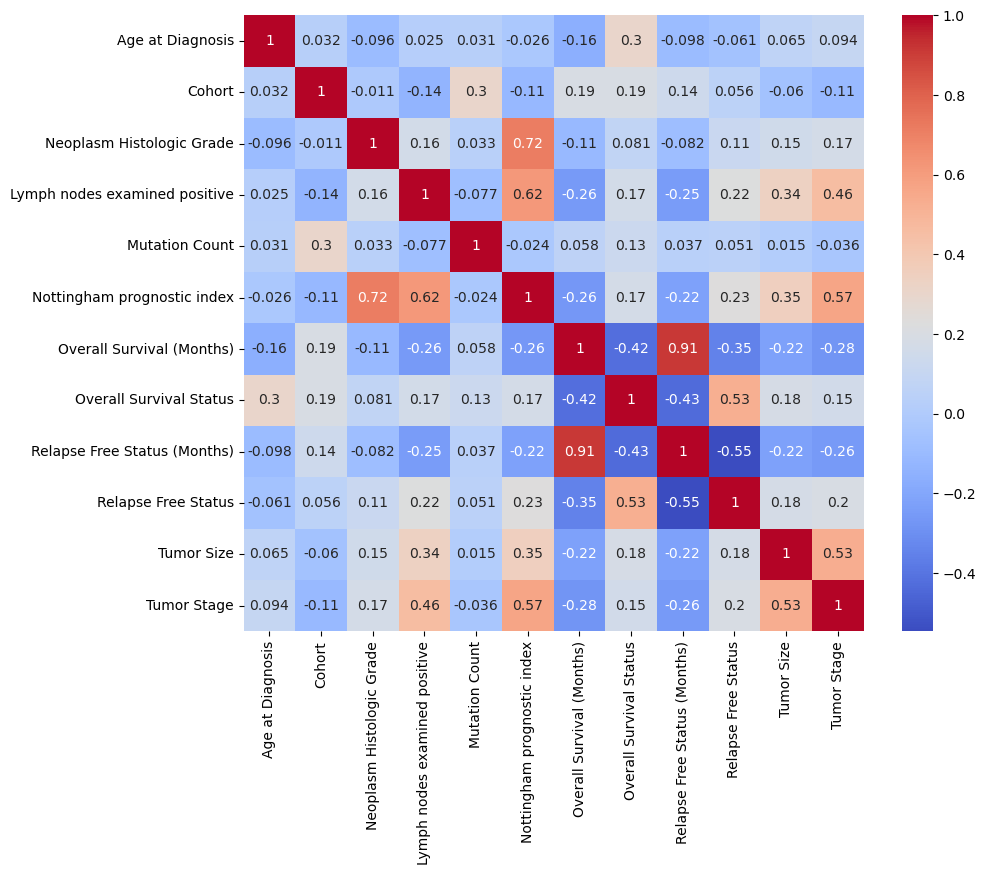

In [177]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [550]:
df_cox_model= df[['Overall Survival (Months)','Overall Survival Status','Age Group','Neoplasm Histologic Grade','PR Status', 'Tumor Stage','Chemotherapy','Hormone Therapy','Radio Therapy','Inferred Menopausal State']]

In [552]:
df_cox_model

,Overall Survival (Months),Overall Survival Status,Age Group,Neoplasm Histologic Grade,PR Status,Tumor Stage,Chemotherapy,Hormone Therapy,Radio Therapy,Inferred Menopausal State
0,140.500000,Living,70.0-80.0,3.0,Negative,2.0,No,Yes,Yes,Post
1,84.633333,Living,40.0-50.0,3.0,Positive,1.0,No,Yes,Yes,Pre
2,163.700000,Deceased,40.0-50.0,2.0,Positive,2.0,Yes,Yes,No,Pre
3,164.933333,Living,40.0-50.0,2.0,Positive,2.0,Yes,Yes,Yes,Pre
4,41.366667,Deceased,70.0-80.0,3.0,Positive,2.0,Yes,Yes,Yes,Post
...,...,...,...,...,...,...,...,...,...,...
2504,NaN,NaN,70.0-80.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN
2505,NaN,NaN,60.0-70.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN
2506,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2507,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [554]:
print(df_cox_model.columns)

Index(['Overall Survival (Months)', 'Overall Survival Status', 'Age Group', 'Neoplasm Histologic Grade', 'PR Status', 'Tumor Stage', 'Chemotherapy', 'Hormone Therapy', 'Radio Therapy', 'Inferred Menopausal State'], dtype='object')


In [534]:
# Check for missing values in the entire DataFrame
missing_values = df_cox_model.isnull().sum()

# Print the columns that have missing values
print(missing_values[missing_values > 0])

Overall Survival (Months)    528
Overall Survival Status      528
Age Group                     11
Neoplasm Histologic Grade    121
PR Status                    529
Tumor Stage                  721
Chemotherapy                 529
Hormone Therapy              529
Radio Therapy                529
Inferred Menopausal State    529
dtype: int64


In [556]:
df_cox = df_cox_model.dropna()

In [558]:
df_cox

,Overall Survival (Months),Overall Survival Status,Age Group,Neoplasm Histologic Grade,PR Status,Tumor Stage,Chemotherapy,Hormone Therapy,Radio Therapy,Inferred Menopausal State
0,140.500000,Living,70.0-80.0,3.0,Negative,2.0,No,Yes,Yes,Post
1,84.633333,Living,40.0-50.0,3.0,Positive,1.0,No,Yes,Yes,Pre
2,163.700000,Deceased,40.0-50.0,2.0,Positive,2.0,Yes,Yes,No,Pre
3,164.933333,Living,40.0-50.0,2.0,Positive,2.0,Yes,Yes,Yes,Pre
4,41.366667,Deceased,70.0-80.0,3.0,Positive,2.0,Yes,Yes,Yes,Post
...,...,...,...,...,...,...,...,...,...,...
1698,201.166667,Living,70.0-80.0,1.0,Positive,1.0,No,No,Yes,Post
1700,105.200000,Deceased,70.0-80.0,3.0,Negative,1.0,No,No,No,Post
1702,200.333333,Living,50.0-60.0,2.0,Positive,2.0,Yes,No,Yes,Post
1707,14.700000,Deceased,40.0-50.0,3.0,Negative,2.0,Yes,No,Yes,Pre


In [560]:
df_cox.columns

Index(['Overall Survival (Months)', 'Overall Survival Status', 'Age Group', 'Neoplasm Histologic Grade', 'PR Status', 'Tumor Stage', 'Chemotherapy', 'Hormone Therapy', 'Radio Therapy', 'Inferred Menopausal State'], dtype='object')

In [169]:
df = df.dropna()

In [171]:
df

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Primary Tumor Laterality,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status,Age Group
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,Positive,3.0,Neutral,Negative,Ductal/NST,Yes,Pre,4ER+,Right,0.0,2.0,4.020,IDC,84.633333,0,Positive,Yes,83.52,0,Female,ER+/HER2- High Prolif,10.0,1.0,Living,40.0-50.0
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,Positive,3.0,Neutral,Negative,Mixed,Yes,Post,9,Right,8.0,2.0,6.080,MDLC,41.366667,1,Positive,Yes,18.55,1,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease,70.0-80.0
5,MB-0010,78.77,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,Positve,Positive,3.0,Neutral,Negative,Ductal/NST,Yes,Post,7,Left,0.0,4.0,4.062,IDC,7.800000,1,Positive,Yes,2.89,1,Female,ER+/HER2- High Prolif,31.0,4.0,Died of Disease,70.0-80.0
10,MB-0028,86.41,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,Positve,Positive,3.0,Gain,Negative,Ductal/NST,Yes,Post,9,Right,1.0,4.0,5.032,IDC,36.566667,1,Negative,Yes,36.09,0,Female,ER+/HER2- High Prolif,16.0,2.0,Died of Other Causes,80.0-90.0
11,MB-0035,84.22,Mastectomy,Breast Cancer,Breast Invasive Lobular Carcinoma,High,No,Her2,1.0,Negative,Positive,2.0,Loss,Negative,Lobular,No,Post,3,Left,0.0,5.0,3.056,ILC,36.266667,1,Negative,No,35.79,1,Female,ER+/HER2- High Prolif,28.0,2.0,Died of Disease,80.0-90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,MB-6232,71.22,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,No,LumA,5.0,Positve,Positive,2.0,Neutral,Negative,Mixed,Yes,Post,3,Left,4.0,11.0,5.060,MDLC,85.000000,1,Positive,No,83.88,0,Female,ER+/HER2- Low Prolif,30.0,2.0,Died of Other Causes,70.0-80.0
1698,MB-6233,70.65,Breast Conserving,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,No,LumB,5.0,Positve,Positive,1.0,Neutral,Negative,Mixed,No,Post,8,Left,0.0,9.0,2.040,MDLC,201.166667,0,Positive,Yes,198.52,0,Female,ER+/HER2- Low Prolif,20.0,1.0,Living,70.0-80.0
1700,MB-6237,75.62,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,Basal,5.0,Negative,Negative,3.0,Gain,Negative,Ductal/NST,No,Post,10,Right,0.0,4.0,4.040,IDC,105.200000,1,Negative,No,103.82,0,Female,ER-/HER2-,20.0,1.0,Died of Other Causes,70.0-80.0
1702,MB-6239,52.84,Breast Conserving,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,Normal,5.0,Positve,Positive,2.0,Neutral,Negative,Mixed,No,Post,8,Right,6.0,5.0,5.040,MDLC,200.333333,0,Positive,Yes,197.70,0,Female,ER+/HER2- High Prolif,20.0,2.0,Living,50.0-60.0


# **Model Selection**

In [207]:
df_new = df.drop('Age Group', axis=1)

In [209]:
df_new

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Primary Tumor Laterality,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,Positive,3.0,Neutral,Negative,Ductal/NST,Yes,Pre,4ER+,Right,0.0,2.0,4.020,IDC,84.633333,0,Positive,Yes,83.52,0,Female,ER+/HER2- High Prolif,10.0,1,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,Positive,3.0,Neutral,Negative,Mixed,Yes,Post,9,Right,8.0,2.0,6.080,MDLC,41.366667,1,Positive,Yes,18.55,1,Female,ER+/HER2- High Prolif,40.0,2,Died of Disease
5,MB-0010,78.77,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,Positve,Positive,3.0,Neutral,Negative,Ductal/NST,Yes,Post,7,Left,0.0,4.0,4.062,IDC,7.800000,1,Positive,Yes,2.89,1,Female,ER+/HER2- High Prolif,31.0,4,Died of Disease
10,MB-0028,86.41,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,Positve,Positive,3.0,Gain,Negative,Ductal/NST,Yes,Post,9,Right,1.0,4.0,5.032,IDC,36.566667,1,Negative,Yes,36.09,0,Female,ER+/HER2- High Prolif,16.0,2,Died of Other Causes
11,MB-0035,84.22,Mastectomy,Breast Cancer,Breast Invasive Lobular Carcinoma,High,No,Her2,1.0,Negative,Positive,2.0,Loss,Negative,Lobular,No,Post,3,Left,0.0,5.0,3.056,ILC,36.266667,1,Negative,No,35.79,1,Female,ER+/HER2- High Prolif,28.0,2,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,MB-6232,71.22,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,No,LumA,5.0,Positve,Positive,2.0,Neutral,Negative,Mixed,Yes,Post,3,Left,4.0,11.0,5.060,MDLC,85.000000,1,Positive,No,83.88,0,Female,ER+/HER2- Low Prolif,30.0,2,Died of Other Causes
1698,MB-6233,70.65,Breast Conserving,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,No,LumB,5.0,Positve,Positive,1.0,Neutral,Negative,Mixed,No,Post,8,Left,0.0,9.0,2.040,MDLC,201.166667,0,Positive,Yes,198.52,0,Female,ER+/HER2- Low Prolif,20.0,1,Living
1700,MB-6237,75.62,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,Basal,5.0,Negative,Negative,3.0,Gain,Negative,Ductal/NST,No,Post,10,Right,0.0,4.0,4.040,IDC,105.200000,1,Negative,No,103.82,0,Female,ER-/HER2-,20.0,1,Died of Other Causes
1702,MB-6239,52.84,Breast Conserving,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,Normal,5.0,Positve,Positive,2.0,Neutral,Negative,Mixed,No,Post,8,Right,6.0,5.0,5.040,MDLC,200.333333,0,Positive,Yes,197.70,0,Female,ER+/HER2- High Prolif,20.0,2,Living


In [211]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1092 entries, 1 to 1743
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Patient ID                      1092 non-null   object  
 1   Age at Diagnosis                1092 non-null   float64 
 2   Type of Breast Surgery          1092 non-null   category
 3   Cancer Type                     1092 non-null   category
 4   Cancer Type Detailed            1092 non-null   category
 5   Cellularity                     1092 non-null   category
 6   Chemotherapy                    1092 non-null   category
 7   Pam50 + Claudin-low subtype     1092 non-null   category
 8   Cohort                          1092 non-null   float64 
 9   ER status measured by IHC       1092 non-null   category
 10  ER Status                       1092 non-null   category
 11  Neoplasm Histologic Grade       1092 non-null   float64 
 12  HER2 status measured by S

**Feature Engineering**

In [214]:
# Creating a binary target for 10-year mortality risk
df_new['10_year_mortality_risk'] = (df_new['Overall Survival (Months)'] <= 120) & (df_new['Overall Survival Status'] == 1)
df_new['10_year_mortality_risk'] = df_new['10_year_mortality_risk'].astype(int)

In [332]:
class_counts = df_new['10_year_mortality_risk'].value_counts()
print(class_counts)

10_year_mortality_risk
0    674
1    418
Name: count, dtype: int64


In [334]:
class_proportions = class_counts / len(df_new)
print(class_proportions)

10_year_mortality_risk
0    0.617216
1    0.382784
Name: count, dtype: float64


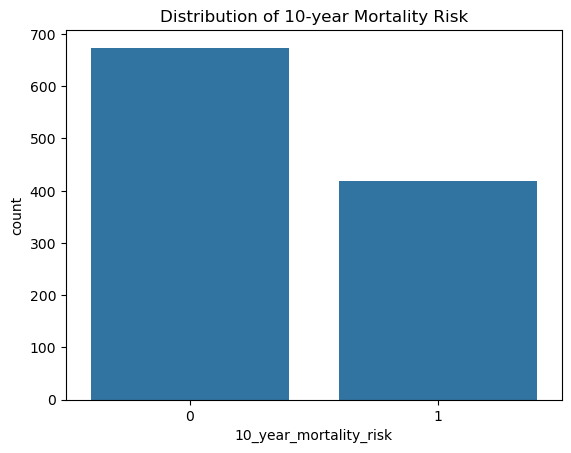

In [336]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='10_year_mortality_risk', data=df_new)
plt.title('Distribution of 10-year Mortality Risk')
plt.show()

**Train-Test Split**

In [338]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df_new.drop(columns=['Patient ID', 'Overall Survival (Months)', 'Overall Survival Status', '10_year_mortality_risk'])
y = df_new['10_year_mortality_risk']

# Convert categorical features to one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

**Standardization**

In [340]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Train Models**

**Logistic Regression:**

In [443]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9452054794520548
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       135
           1       0.88      0.99      0.93        84

    accuracy                           0.95       219
   macro avg       0.94      0.95      0.94       219
weighted avg       0.95      0.95      0.95       219



**Support Vector Machine:**

In [295]:
from sklearn.svm import SVC

# Enable probability estimation by setting `probability=True`
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8995433789954338
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       135
           1       0.84      0.92      0.88        84

    accuracy                           0.90       219
   macro avg       0.89      0.90      0.90       219
weighted avg       0.90      0.90      0.90       219



**Decision Tree**

In [427]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy)

# Generate and print a classification report
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9497716894977168
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       135
           1       0.91      0.96      0.94        84

    accuracy                           0.95       219
   macro avg       0.94      0.95      0.95       219
weighted avg       0.95      0.95      0.95       219



**Model Performance**

**ROC-AUC Score and ROC Curve**

Logistic Regression ROC-AUC Score: 0.9803350970017637
SVM ROC-AUC Score: 0.9658289241622575
Decision Tree ROC-AUC Score: 0.9525132275132276


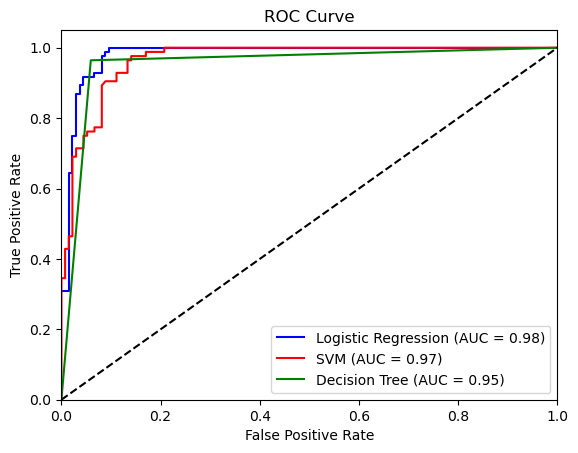

In [439]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

# Calculate ROC-AUC scores
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

print("Logistic Regression ROC-AUC Score:", roc_auc_lr)
print("SVM ROC-AUC Score:", roc_auc_svm)
print("Decision Tree ROC-AUC Score:", roc_auc_dt)

# Plot ROC Curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve in the image presents the performance of three classification models: Logistic Regression, SVM (Support Vector Machine), and Decision Tree, in terms of their ability to distinguish between the two classes in your 10-year mortality prediction model.

### Key Points from the ROC Curve:

1. **True Positive Rate (TPR) vs. False Positive Rate (FPR)**: 
   - The ROC curve plots the True Positive Rate (TPR) or sensitivity (y-axis) against the False Positive Rate (FPR) or 1-specificity (x-axis).
   - A model with perfect predictions would have a curve that reaches the top-left corner (TPR = 1 and FPR = 0).

2. **Area Under the Curve (AUC)**: 
   - The AUC value reflects how well the model can distinguish between the two classes. A higher AUC value indicates better performance.
   - **Logistic Regression**: AUC = 0.99 (excellent performance)
   - **SVM**: AUC = 0.97 (very good performance)
   - **Decision Tree**: AUC = 0.95 (good performance)

3. **Model Comparison**:
   - **Logistic Regression** performs the best with an AUC of 0.99, indicating that it has the best balance between sensitivity and specificity.
   - **SVM** comes close with an AUC of 0.97, indicating slightly lower performance than Logistic Regression but still highly effective.
   - **Decision Tree** has the lowest AUC at 0.95, though still a strong model, it performs slightly worse than the other two models.

4. **Interpretation**:
   - **Logistic Regression** is likely the best model for predicting the 10-year mortality risk based on this ROC curve since it maximizes the AUC.
   - **SVM** also performs well and may be a good candidate depending on other factors like interpretability or computational efficiency.
   - **Decision Tree** performs the least well in this comparison but might still be valuable due to its simplicity and ability to handle categorical features well.

In summary, **Logistic Regression** appears to be the most effective model for your project based on the ROC curves and AUC values, followed by **SVM** and then **Decision Tree**. However, other factors such as interpretability, overfitting, and computational cost should be considered before making a final decision.compete with the other two models.

**To check if the model is overfitting**

In [449]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the Logistic Regression model
lr = LogisticRegression(C=0.01)
lr.fit(X_train, y_train)

# Predictions for the training and test sets
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Calculate accuracy for the training and test sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracies
print("Logistic Regression Training Accuracy:", train_accuracy)
print("Logistic Regression Test Accuracy:", test_accuracy)

# Check for overfitting
if train_accuracy > test_accuracy:
    print("The model is not overfitting.")
else:
    print("The model might be overfitting.")

Logistic Regression Training Accuracy: 0.9221076746849943
Logistic Regression Test Accuracy: 0.9178082191780822
The model is not overfitting.
